In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from collections import Counter
from numpy import where
from imblearn.over_sampling import SMOTE 
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
import resampling_helper
from sklearn.metrics import PrecisionRecallDisplay

In [28]:
df = pd.read_csv("creditcard.csv")

In [29]:
print("number of rows are:"+ str(df.shape[0]))
print("number of feature are:"+ str(df.shape[1]))

number of rows are:284807
number of feature are:31


In [30]:
df.head(15)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [31]:
df.columns.values.tolist()

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [32]:
occ = df['Class'].value_counts()
num_tra = df.shape[0]
not_fraud_perc = occ[1]/num_tra
fraud_perc = occ[0]/num_tra
print(fraud_perc)
print(not_fraud_perc)

0.9982725143693799
0.001727485630620034


([<matplotlib.patches.Wedge at 0x28d1ab9ec70>,
 [Text(-1.09998380137016, 0.0059696501784341355, 'not_fraud'),
  Text(1.0999838018177286, -0.005969567707642625, 'fraud')])

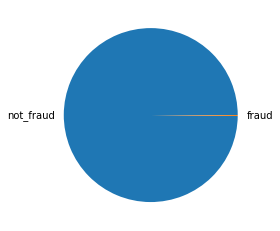

In [33]:
labels = ["not_fraud", "fraud"]
plt.pie([fraud_perc,not_fraud_perc],labels = labels)

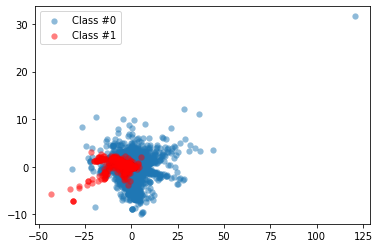

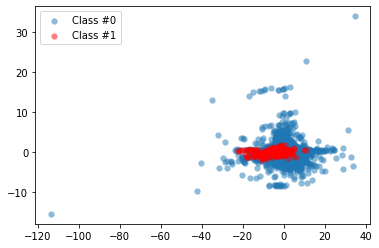

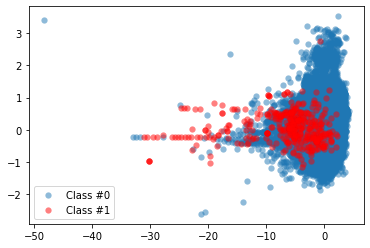

In [34]:
def prep_data(X,y) -> (np.ndarray, np.ndarray):
    """
    Convert the DataFrame into two variable
    X: data columns (V1 - V28)
    y: lable column
    """
    X = X.values
    y = y.values
    return X, y
def plot_data(X: np.ndarray, y: np.ndarray):
    plt.scatter(X[y == 0, 7], X[y == 0, df.shape[1]-4], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 7], X[y == 1, df.shape[1]-4], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    plt.show()

    plt.scatter(X[y == 0, 5], X[y == 0, df.shape[1]-3], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 5], X[y == 1, df.shape[1]-3], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    plt.show()

    plt.scatter(X[y == 0, 3], X[y == 0, df.shape[1]-5], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 3], X[y == 1, df.shape[1]-5], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    plt.show()

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 0:df.shape[1]-1],
                                                  df.Class,
                                                  test_size = 0.2,
                                                  random_state = 42 )
X, y = prep_data(X_train, y_train)
plot_data(X, y)

In [35]:
oversample = SMOTE()
X, y = oversample.fit_resample(X_train, y_train)

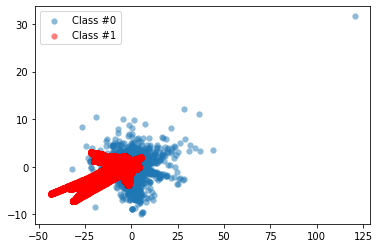

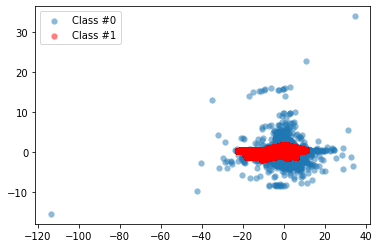

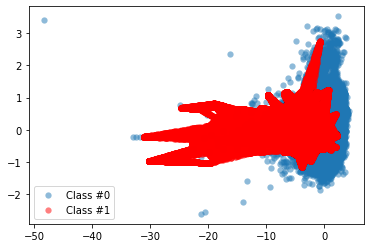

In [36]:
X_forplot, y_forplot = prep_data(X, y)
plot_data(X_forplot, y_forplot)

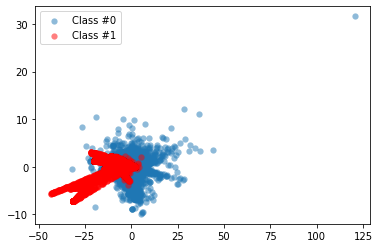

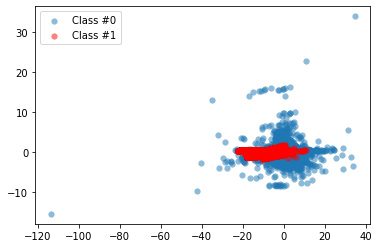

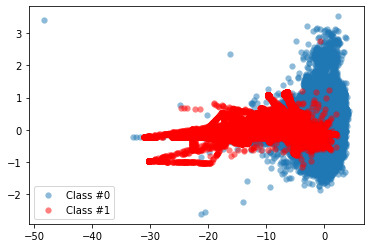

In [37]:
oversample = BorderlineSMOTE(sampling_strategy=0.05)
X, y = oversample.fit_resample(X_train, y_train)
X_forplot, y_forplot = prep_data(X, y)
plot_data(X_forplot, y_forplot)

In [38]:
df_new = pd.DataFrame(y, columns = ['Class'])
occ = df_new['Class'].value_counts()
num_tra = df_new.shape[0]
not_fraud_perc = occ[1]/num_tra
fraud_perc = occ[0]/num_tra
print(fraud_perc)
print(not_fraud_perc)

0.952383145676924
0.04761685432307609


([<matplotlib.patches.Wedge at 0x28d1c1e4310>,
 [Text(-1.087715046166957, 0.1639389469955656, 'not_fraud'),
  Text(1.0877150538414917, -0.1639388960759489, 'fraud')])

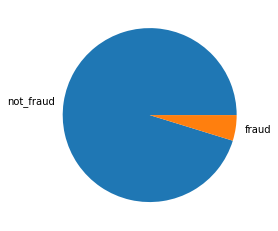

In [39]:
labels = ["not_fraud", "fraud"]
plt.pie([fraud_perc,not_fraud_perc],labels = labels)

In [40]:
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train, y_train)

y_pred=logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[56853    11]
 [   48    50]]


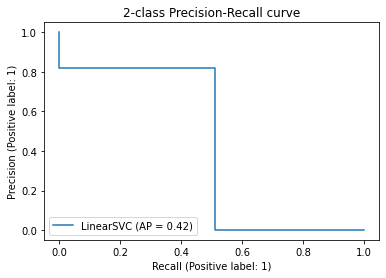

In [41]:
display = PrecisionRecallDisplay.from_predictions(y_test, y_pred, name="LinearSVC")
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.51      0.63        98

    accuracy                           1.00     56962
   macro avg       0.91      0.76      0.81     56962
weighted avg       1.00      1.00      1.00     56962



In [42]:
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X, y)

y_pred=logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[56813    51]
 [   24    74]]


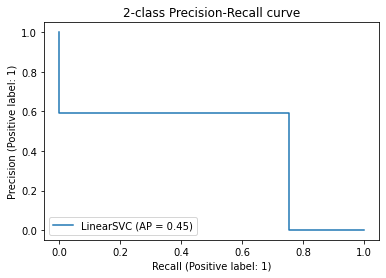

In [43]:
display = PrecisionRecallDisplay.from_predictions(y_test, y_pred, name="LinearSVC")
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [16]:
def classification_report_with_accuracy_score(y_true, y_pred):
    print(classification_report(y_true, y_pred)) # print classification report


[0.93101139 0.96805897 0.96516302 0.9713397  0.96820421]


0.3708505902954398

In [17]:
model = LogisticRegression(max_iter=1000)
sampling_strategies = [0.03,0.05,0.08,0.10,0.15,0.20,0.25,0.30]
results = []
for sam in sampling_strategies:
    results.append(resampling_helper.pipeline_for_sampling(X_train=X_train,y_train=y_train,sampling_strategy = sam,model = model))

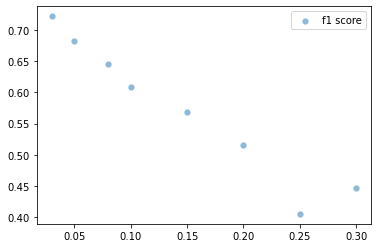

In [18]:
plt.scatter(sampling_strategies, results, label="f1 score", alpha=0.5, linewidth=0.15)
plt.legend()
plt.show()

In [47]:
logreg = GaussianNB()
logreg.fit(X_train, y_train)

y_pred=logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print(classification_report(y_test, y_pred))

[[56502   362]
 [   36    62]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.15      0.63      0.24        98

    accuracy                           0.99     56962
   macro avg       0.57      0.81      0.62     56962
weighted avg       1.00      0.99      1.00     56962



In [48]:
logreg = GaussianNB()
logreg.fit(X, y)

y_pred=logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print(classification_report(y_test, y_pred))

[[56651   213]
 [   40    58]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.21      0.59      0.31        98

    accuracy                           1.00     56962
   macro avg       0.61      0.79      0.66     56962
weighted avg       1.00      1.00      1.00     56962



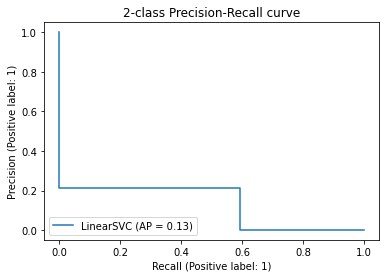

In [45]:
display = PrecisionRecallDisplay.from_predictions(y_test, y_pred, name="LinearSVC")
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [20]:
model = GaussianNB()
sampling_strategies = [0.03,0.05,0.08,0.10,0.15,0.20,0.25,0.30]
results = []
for sam in sampling_strategies:
    results.append(resampling_helper.pipeline_for_sampling(X_train=X_train,y_train=y_train,sampling_strategy = sam,model = model,scoring=classification_report_with_accuracy_score))

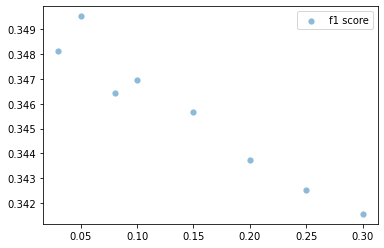

In [21]:
plt.scatter(sampling_strategies, results, label="f1 score", alpha=0.5, linewidth=0.15)
plt.legend()
plt.show()